# 🔍 **EVALUATION DES NEURONALEN NETZES ZUR WERKZEUG-ERKENNUNG**

Das Notebook [semesterarbeit-training.ipynb](semesterarbeit-training.ipynb) produzierte als Ausgabe ein fertig trainiertes neuronales Netz, sowie eine Aufsplittung des Werkzeug-Datensatzes in einen Trainings- und einen Testdatensatz. Hier wollen wir das Modell laden und auf dem Testdatensatz evaluieren.

Die Daten wurden bereits im Training-Notebook extrahiert und in ZIP-Dateien (`training_Baumstruktur.zip` und `testing_Baumstruktur.zip`) gespeichert.

In [75]:
from pathlib import Path
Baumstrukturpfad = Path('Baumstruktur')
testPath = Baumstrukturpfad / "Baumstruktur_test"
testPath.mkdir(parents=True, exist_ok=True)

In [76]:
# Prüfe ob die Baumstruktur bereits vorhanden ist oder aus ZIP-Dateien entpackt werden muss

if testPath.exists():
    Baumstruktur_schon_vorhanden = True
    print(f"✓ Test-Baumstruktur gefunden: {testPath}")
else:
    # Versuche ZIP-Datei zu entpacken
   print("Erst Training dann Evaluieren")

✓ Test-Baumstruktur gefunden: Baumstruktur\Baumstruktur_test


## 🔍 Diagnose: Datenanzahl prüfen

Diese Zelle zeigt, wie viele Bilder wo gefunden wurden und ob die Daten aktuell sind.


In [77]:
import tensorflow as tf
# ============================================================================
# ALLE 3 MODELLE LADEN (Funktion ausgelagert in scripts/load_models.py)
# ============================================================================
# Die Modell-Lade-Logik wurde in scripts/load_models.py ausgelagert
downloadable_output_path = Path('model_output')  # Lokaler Ausgabepfad
model_output_path = downloadable_output_path / 'model'
Datensatzname1 = 'Werkzeuge_simple_cnn' 

Keras_Dateiname = f'model_{Datensatzname1}.keras'
voller_Keras_Dateiname = str(Path(model_output_path)/Keras_Dateiname)
print(voller_Keras_Dateiname)
model1 = tf.keras.models.load_model(voller_Keras_Dateiname)

# Erwartete Klassenreihenfolge aus Training-Notebook (Zelle 10)
# WICHTIG: Kopieren Sie diese aus dem Training-Notebook Zelle 10 (PRÜFUNG 1)!
expected_class_names = ['schraubenschluessel', 'schraubenzieher', 'seidenschneider']



model_output\model\model_Werkzeuge_simple_cnn.keras


In [78]:
# Lade alle Ordner aus Baumstruktur/Baumstruktur_test
# Klassennamen = Unterordnernamen
# Teste jedes Bild mit model1 und gebe das Resultat aus

import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from pathlib import Path
import sys

# Lade drei Arrays mit Bildern aus dem Test-Ordner
# Ein Array für jede Klasse: schraubenschluessel, schraubenzieher, seidenschneider

bilder_schraubenschluessel = []
bilder_schraubenzieher = []
bilder_seidenschneider = []

# Durchlaufe alle Unterordner im Test-Ordner
for klasse_dir in sorted(testPath.iterdir()):
    if klasse_dir.is_dir():
        klasse_name = klasse_dir.name
        
        # Finde alle Bilder in diesem Ordner
        bilder = list(klasse_dir.glob('*.*'))
        bilder = [b for b in bilder if b.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]
        
        # Sortiere die Bilder nach Dateinamen
        bilder = sorted(bilder, key=lambda x: x.name)
        
        # Füge die Bilder zum entsprechenden Array hinzu
        if klasse_name == 'schraubenschluessel':
            bilder_schraubenschluessel = bilder
        elif klasse_name == 'schraubenzieher':
            bilder_schraubenzieher = bilder
        elif klasse_name == 'seidenschneider':
            bilder_seidenschneider = bilder

# Zeige Zusammenfassung
print(f"✓ Bilder geladen:")
print(f"   - schraubenschluessel: {len(bilder_schraubenschluessel)} Bilder")
print(f"   - schraubenzieher: {len(bilder_schraubenzieher)} Bilder")
print(f"   - seidenschneider: {len(bilder_seidenschneider)} Bilder")
print(f"\n📋 Arrays erstellt:")
print(f"   - bilder_schraubenschluessel: Liste mit {len(bilder_schraubenschluessel)} Bildpfaden")
print(f"   - bilder_schraubenzieher: Liste mit {len(bilder_schraubenzieher)} Bildpfaden")
print(f"   - bilder_seidenschneider: Liste mit {len(bilder_seidenschneider)} Bildpfaden")


✓ Bilder geladen:
   - schraubenschluessel: 24 Bilder
   - schraubenzieher: 23 Bilder
   - seidenschneider: 25 Bilder

📋 Arrays erstellt:
   - bilder_schraubenschluessel: Liste mit 24 Bildpfaden
   - bilder_schraubenzieher: Liste mit 23 Bildpfaden
   - bilder_seidenschneider: Liste mit 25 Bildpfaden


Ich habe die Testdaten in 3 Arrays geladen pro klasse. Nun prüfe ich für jeden Testdatensatz das Resultat wenn ich es durch das Model jage. 
Wir fangen mit Schraubenschlüssel an. 

🔍 Teste 23 Schraubenzieher-Bilder mit model1

📷 Erstes Testbild: IMG_1886.JPEG


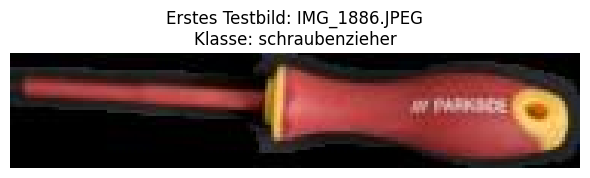


Bild                           | schraubenschluessel  | schraubenzieher      | seidenschneider      | Beste Klasse        
--------------------------------------------------------------------------------
IMG_1886.JPEG                  |              0.0000 |              1.0000 |              0.0000 | schraubenzieher      (1.0000)
IMG_1890.JPEG                  |              0.0000 |              0.9999 |              0.0000 | schraubenzieher      (0.9999)
IMG_1895.JPEG                  |              0.0000 |              1.0000 |              0.0000 | schraubenzieher      (1.0000)
IMG_1906.JPEG                  |              0.0000 |              1.0000 |              0.0000 | schraubenzieher      (1.0000)
IMG_1911.JPEG                  |              0.0000 |              0.9992 |              0.0008 | schraubenzieher      (0.9992)
IMG_1916.JPEG                  |              0.0001 |              0.9999 |              0.0001 | schraubenzieher      (0.9999)
IMG_1917.JPEG        

In [79]:
# Teste alle Schraubenzieher-Bilder mit model1
# Gebe für jedes Bild die Vorhersagewahrscheinlichkeiten für alle 3 Klassen aus
# Zeige zusätzlich das erste Testbild an

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Bildgröße muss mit Training übereinstimmen
image_size = (256, 256)

print(f"🔍 Teste {len(bilder_schraubenzieher)} Schraubenzieher-Bilder mit model1")
print(f"{'='*80}")

# Zeige das erste Testbild
if len(bilder_schraubenzieher) > 0:
    first_image_path = bilder_schraubenzieher[0]
    print(f"\n📷 Erstes Testbild: {first_image_path.name}")
    
    try:
        img_first = Image.open(first_image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img_first)
        plt.title(f"Erstes Testbild: {first_image_path.name}\nKlasse: schraubenzieher")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"   ⚠ Fehler beim Laden des ersten Bildes: {e}")

print(f"\n{'Bild':<30s} | {'schraubenschluessel':<20s} | {'schraubenzieher':<20s} | {'seidenschneider':<20s} | {'Beste Klasse':<20s}")
print(f"{'-'*80}")

for i, bild_path in enumerate(bilder_schraubenzieher, 1):
    try:
        # Lade und verarbeite Bild
        img = Image.open(bild_path)
        img_resized = img.resize(image_size, Image.Resampling.LANCZOS)
        img_array = np.array(img_resized)
        
        # Batch-Dimension hinzufügen
        img_batch = img_array.reshape(1, *image_size, 3)
        
        # Vorhersage mit model1 - gibt Wahrscheinlichkeiten für alle Klassen zurück
        prediction = model1.predict(img_batch, verbose=0)
        
        # Extrahiere Wahrscheinlichkeiten für alle 3 Klassen
        prob_schraubenschluessel = prediction[0][0]
        prob_schraubenzieher = prediction[0][1]
        prob_seidenschneider = prediction[0][2]
        
        # Finde beste Klasse
        best_class_idx = np.argmax(prediction[0])
        best_class_name = expected_class_names[best_class_idx]
        best_class_prob = prediction[0][best_class_idx]
        
        # Ausgabe
        print(f"{bild_path.name:<30s} | {prob_schraubenschluessel:>19.4f} | {prob_schraubenzieher:>19.4f} | {prob_seidenschneider:>19.4f} | {best_class_name:<20s} ({best_class_prob:.4f})")
        
    except Exception as e:
        print(f"{bild_path.name:<30s} | Fehler: {e}")

print(f"{'-'*80}")
print(f"✓ Alle {len(bilder_schraubenzieher)} Bilder getestet")


🔍 Teste 24 Schraubenschlüssel-Bilder mit model1

📷 Erstes Testbild: IMG_2126.JPEG


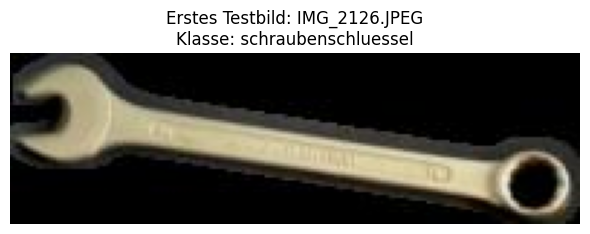


Bild                           | schraubenschluessel  | schraubenzieher      | seidenschneider      | Beste Klasse        
--------------------------------------------------------------------------------
IMG_2126.JPEG                  |              1.0000 |              0.0000 |              0.0000 | schraubenschluessel  (1.0000)
IMG_2127.JPEG                  |              1.0000 |              0.0000 |              0.0000 | schraubenschluessel  (1.0000)
IMG_2139.JPEG                  |              1.0000 |              0.0000 |              0.0000 | schraubenschluessel  (1.0000)
IMG_2145.JPEG                  |              1.0000 |              0.0000 |              0.0000 | schraubenschluessel  (1.0000)
IMG_2146.JPEG                  |              1.0000 |              0.0000 |              0.0000 | schraubenschluessel  (1.0000)
IMG_2148.JPEG                  |              1.0000 |              0.0000 |              0.0000 | schraubenschluessel  (1.0000)
IMG_2154.JPEG        

In [80]:
# Teste alle Schraubenschlüssel-Bilder mit model1
# Gebe für jedes Bild die Vorhersagewahrscheinlichkeiten für alle 3 Klassen aus
# Zeige zusätzlich das erste Testbild an

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Bildgröße muss mit Training übereinstimmen
image_size = (256, 256)

print(f"🔍 Teste {len(bilder_schraubenschluessel)} Schraubenschlüssel-Bilder mit model1")
print(f"{'='*80}")

# Zeige das erste Testbild
if len(bilder_schraubenschluessel) > 0:
    first_image_path = bilder_schraubenschluessel[0]
    print(f"\n📷 Erstes Testbild: {first_image_path.name}")
    
    try:
        img_first = Image.open(first_image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img_first)
        plt.title(f"Erstes Testbild: {first_image_path.name}\nKlasse: schraubenschluessel")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"   ⚠ Fehler beim Laden des ersten Bildes: {e}")

print(f"\n{'Bild':<30s} | {'schraubenschluessel':<20s} | {'schraubenzieher':<20s} | {'seidenschneider':<20s} | {'Beste Klasse':<20s}")
print(f"{'-'*80}")

for i, bild_path in enumerate(bilder_schraubenschluessel, 1):
    try:
        # Lade und verarbeite Bild
        img = Image.open(bild_path)
        img_resized = img.resize(image_size, Image.Resampling.LANCZOS)
        img_array = np.array(img_resized) # Normalisierung
        
        # Batch-Dimension hinzufügen
        img_batch = img_array.reshape(1, *image_size, 3)
        
        # Vorhersage mit model1 - gibt Wahrscheinlichkeiten für alle Klassen zurück
        prediction = model1.predict(img_batch, verbose=0)
        
        # Extrahiere Wahrscheinlichkeiten für alle 3 Klassen
        prob_schraubenschluessel = prediction[0][0]
        prob_schraubenzieher = prediction[0][1]
        prob_seidenschneider = prediction[0][2]
        
        # Finde beste Klasse
        best_class_idx = np.argmax(prediction[0])
        best_class_name = expected_class_names[best_class_idx]
        best_class_prob = prediction[0][best_class_idx]
        
        # Ausgabe
        print(f"{bild_path.name:<30s} | {prob_schraubenschluessel:>19.4f} | {prob_schraubenzieher:>19.4f} | {prob_seidenschneider:>19.4f} | {best_class_name:<20s} ({best_class_prob:.4f})")
        
    except Exception as e:
        print(f"{bild_path.name:<30s} | Fehler: {e}")

print(f"{'-'*80}")
print(f"✓ Alle {len(bilder_schraubenschluessel)} Bilder getestet")


🔍 Teste 25 Seidenschneider-Bilder mit model1

📷 Erstes Testbild: IMG_2009.JPEG


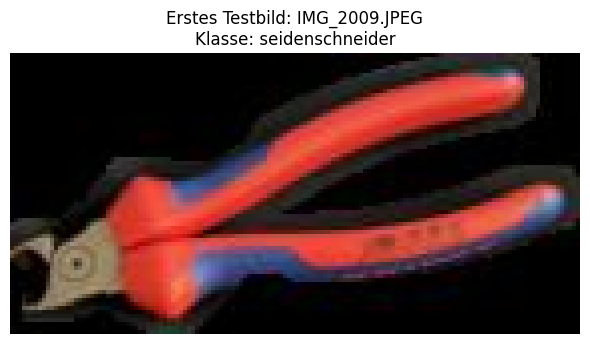


Bild                           | schraubenschluessel  | schraubenzieher      | seidenschneider      | Beste Klasse        
--------------------------------------------------------------------------------
IMG_2009.JPEG                  |              0.0000 |              0.0000 |              1.0000 | seidenschneider      (1.0000)
IMG_2017.JPEG                  |              0.0000 |              0.0000 |              1.0000 | seidenschneider      (1.0000)
IMG_2022.JPEG                  |              0.0000 |              0.0000 |              1.0000 | seidenschneider      (1.0000)
IMG_2025.JPEG                  |              0.0000 |              0.0000 |              1.0000 | seidenschneider      (1.0000)
IMG_2026.JPEG                  |              0.0000 |              0.0000 |              1.0000 | seidenschneider      (1.0000)
IMG_2039.JPEG                  |              0.0000 |              0.0000 |              1.0000 | seidenschneider      (1.0000)
IMG_2042.JPEG        

In [81]:
# Teste alle Seidenschneider-Bilder mit model1
# Gebe für jedes Bild die Vorhersagewahrscheinlichkeiten für alle 3 Klassen aus
# Zeige zusätzlich das erste Testbild an

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Bildgröße muss mit Training übereinstimmen
image_size = (256, 256)

print(f"🔍 Teste {len(bilder_seidenschneider)} Seidenschneider-Bilder mit model1")
print(f"{'='*80}")

# Zeige das erste Testbild
if len(bilder_seidenschneider) > 0:
    first_image_path = bilder_seidenschneider[0]
    print(f"\n📷 Erstes Testbild: {first_image_path.name}")
    
    try:
        img_first = Image.open(first_image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img_first)
        plt.title(f"Erstes Testbild: {first_image_path.name}\nKlasse: seidenschneider")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"   ⚠ Fehler beim Laden des ersten Bildes: {e}")

print(f"\n{'Bild':<30s} | {'schraubenschluessel':<20s} | {'schraubenzieher':<20s} | {'seidenschneider':<20s} | {'Beste Klasse':<20s}")
print(f"{'-'*80}")

for i, bild_path in enumerate(bilder_seidenschneider, 1):
    try:
        # Lade und verarbeite Bild
        img = Image.open(bild_path)
        img_resized = img.resize(image_size, Image.Resampling.LANCZOS)
        img_array = np.array(img_resized)  # Normalisierung
        
        # Batch-Dimension hinzufügen
        img_batch = img_array.reshape(1, *image_size, 3)
        
        # Vorhersage mit model1 - gibt Wahrscheinlichkeiten für alle Klassen zurück
        prediction = model1.predict(img_batch, verbose=0)
        
        # Extrahiere Wahrscheinlichkeiten für alle 3 Klassen
        prob_schraubenschluessel = prediction[0][0]
        prob_schraubenzieher = prediction[0][1]
        prob_seidenschneider = prediction[0][2]
        
        # Finde beste Klasse
        best_class_idx = np.argmax(prediction[0])
        best_class_name = expected_class_names[best_class_idx]
        best_class_prob = prediction[0][best_class_idx]
        
        # Ausgabe
        print(f"{bild_path.name:<30s} | {prob_schraubenschluessel:>19.4f} | {prob_schraubenzieher:>19.4f} | {prob_seidenschneider:>19.4f} | {best_class_name:<20s} ({best_class_prob:.4f})")
        
    except Exception as e:
        print(f"{bild_path.name:<30s} | Fehler: {e}")

print(f"{'-'*80}")
print(f"✓ Alle {len(bilder_seidenschneider)} Bilder getestet")


## Was ist `y_test`?

`y_test` enthält die **tatsächlichen (wahren) Klassenlabels** der Testbilder. Es gibt mehrere Varianten im Notebook:

- **`y_test`**: pandas Series mit Klassennamen als Strings (z.B. "schraubenschluessel", "schraubenzieher", "seidenschneider")
- **`y_test_numeric`**: numpy Array mit numerischen Labels (0, 1, 2, ...)
- **`y_test_label`**: pandas Series mit Klassennamen (konvertiert aus numerischen Labels)

Diese Variablen werden verwendet, um die Modellvorhersagen zu bewerten (Accuracy, Precision, Recall, F1-Score).


# Scikit-Plot
Wir sind bereit! Wir kennen die Testbilder, deren zugehörige Klassenlabel und Vorhersagen durch das geladene Modell. Wir folgen der Dokumentation [hier](https://scikit-plot.readthedocs.io/en/stable/metrics.html). Berechnen wir Metriken! Wir beginnen mit der Confusion Matrix:

📊 Sammle Daten aus den drei Test-Blöcken...
   - Schraubenschlüssel: 24 Bilder
   - Schraubenzieher: 23 Bilder
   - Seidenschneider: 25 Bilder

✓ 72 Test-Bilder verarbeitet

Classification Report:
                     precision    recall  f1-score   support

schraubenschluessel       1.00      1.00      1.00        24
    schraubenzieher       1.00      1.00      1.00        23
    seidenschneider       1.00      1.00      1.00        25

           accuracy                           1.00        72
          macro avg       1.00      1.00      1.00        72
       weighted avg       1.00      1.00      1.00        72



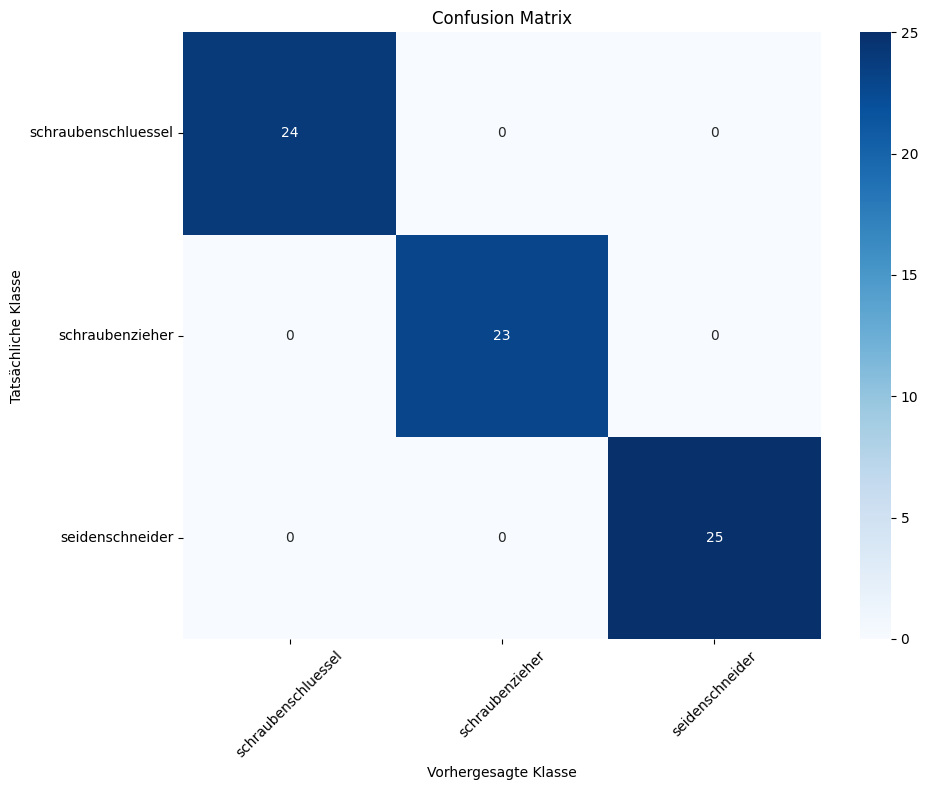

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# Sammle Daten aus den drei Test-Blöcken
# Erstelle y_test_label und yhat_label aus den drei Arrays

# Prüfe ob die drei Arrays existieren
if 'bilder_schraubenschluessel' not in globals() or 'bilder_schraubenzieher' not in globals() or 'bilder_seidenschneider' not in globals():
    print("⚠️ FEHLER: Die drei Bild-Arrays sind nicht definiert!")
    print("   Bitte führen Sie zuerst die Zellen 7, 8 und 9 aus, um die Test-Bilder zu testen.")
    raise NameError("bilder_schraubenschluessel, bilder_schraubenzieher und bilder_seidenschneider müssen zuerst erstellt werden!")

# Bildgröße muss mit Training übereinstimmen
image_size = (256, 256)

# Sammle alle Test-Bilder und Vorhersagen
y_test_list = []
yhat_list = []

# Definiere die Zuordnung zwischen Bildern und Klassen
bilder_klassen = {
    'schraubenschluessel': bilder_schraubenschluessel,
    'schraubenzieher': bilder_schraubenzieher,
    'seidenschneider': bilder_seidenschneider
}

print("📊 Sammle Daten aus den drei Test-Blöcken...")
print(f"   - Schraubenschlüssel: {len(bilder_schraubenschluessel)} Bilder")
print(f"   - Schraubenzieher: {len(bilder_schraubenzieher)} Bilder")
print(f"   - Seidenschneider: {len(bilder_seidenschneider)} Bilder")

# Durchlaufe alle drei Klassen
for klasse_name, bilder_liste in bilder_klassen.items():
    for bild_path in bilder_liste:
        try:
            # Lade und verarbeite Bild
            img = Image.open(bild_path)
            img_resized = img.resize(image_size, Image.Resampling.LANCZOS)
            img_array = np.array(img_resized)  # Normalisierung
            
            # Batch-Dimension hinzufügen
            img_batch = img_array.reshape(1, *image_size, 3)
            
            # Vorhersage mit model1
            prediction = model1.predict(img_batch, verbose=0)
            predicted_class_idx = np.argmax(prediction[0])
            predicted_class_name = expected_class_names[predicted_class_idx]
            
            # Speichere Ergebnisse
            y_test_list.append(klasse_name)
            yhat_list.append(predicted_class_name)
            
        except Exception as e:
            print(f"⚠️ Fehler bei {bild_path.name}: {e}")
            continue

# Erstelle pandas Series
y_test_label = pd.Series(y_test_list)
yhat_label = pd.Series(yhat_list)

# Definiere sorted_class_labels aus den erwarteten Klassennamen
sorted_class_labels = sorted(expected_class_names)

print(f"\n✓ {len(y_test_label)} Test-Bilder verarbeitet")
print(f"\n{'='*70}")
print("Classification Report:")
print(f"{'='*70}")
print(classification_report(y_test_label, yhat_label, zero_division=0))

# Confusion Matrix (verwendet scikit-plot oder Alternative)
# Prüfe ob scikitplot verfügbar ist
try:
    import scikitplot as skplt
    skplt.metrics.plot_confusion_matrix(
        y_test_label.values, 
        yhat_label.values, 
        labels=sorted_class_labels, 
        x_tick_rotation=45
    )
except ImportError:
    # Alternative mit sklearn und seaborn
    import seaborn as sns
    
    cm = confusion_matrix(y_test_label.values, yhat_label.values, labels=sorted_class_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted_class_labels, 
                yticklabels=sorted_class_labels)
    plt.xlabel('Vorhergesagte Klasse')
    plt.ylabel('Tatsächliche Klasse')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Beachten Sie, wie hübsch blockdiagonal die confusion matrix geworden ist. Dies zeigt, dass das Modell sich meist in der Form, und selten bis nie in der Farbe irrt.  
Ein offensichtliches Problem ist natürlich, dass wir den Grossteil der Daten zum Training benutzt haben (das ist gängige Praxis), und nun nur wenige Beispiele (pro Klasse) übrig haben, um die Präzision und den Recall der Klasse zu schätzen. Mehr Daten wären schon praktisch...

In [83]:
display((y_test_label==yhat_label).value_counts())
print('-'*30)
for curr_class_str in yhat_label.unique():
    curr_class_results=(y_test_label[y_test_label==curr_class_str]==yhat_label[y_test_label==curr_class_str])
    print(f'{curr_class_str:<10}:{100*curr_class_results.mean():3.0f}%')

False    49
True     23
Name: count, dtype: int64

------------------------------
schraubenzieher:100%


Ein Problem hier ist, dass das neuronale Netz für recht viele Klassen ("area=1.000") eine extreme Precision-Recall-Kurve ausgibt- von (0,1) über (1,1) nach (1,0). Aber wer würde sich schon darüber beklagen!

Zur Erinnerung, dies ist das Modell, das die obigen Resultate erziehlt hat. Wir können es grundsätzlich irgendwo (auf einem Raspberry-Pi?) laden und dort Vorhersagen generieren.

In [84]:
model1.summary()

Model: "Conv-Model-Standard"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Eingabe (InputLayer)            │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_7 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_7               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Ausgabe (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,238,123 (96.28 MB)

 Trainable params: 8,412,707 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,825,416 (64.18 MB)

# Conv Layer Outputs
In den nächsten paar Zeilen werden wir ("spasseshalber", ist nicht weiter wichtig), den Output der letzten Conv-Schicht ausgeben und visualisieren.

**Hinweis**: Der Code findet automatisch die letzte Conv2D-Schicht, unabhängig vom Layer-Namen.

In [85]:
from PIL import Image
import numpy as np

# Bildgröße muss mit Training übereinstimmen (256x256)
color_image_size = (256, 256)

# Sammle alle Test-Bilder aus den drei Arrays
all_test_images = bilder_schraubenschluessel + bilder_schraubenzieher + bilder_seidenschneider

# Verwende ein Test-Bild aus dem Dataset
if len(all_test_images) > 0:
    # Wähle zufällig ein Bild aus den Test-Daten
    test_image_path = all_test_images[np.random.randint(len(all_test_images))]
    print(f"Verwende Test-Bild: {test_image_path}")
    
    im = Image.open(test_image_path)
    im_resized = im.resize(color_image_size, Image.Resampling.LANCZOS)
    img = np.array(im_resized) / 255.0  # Normalisierung
    
    # Batch-Dimension hinzufügen
    img_batch = img.reshape(1, *color_image_size, 3)
else:
    raise ValueError("Keine Test-Bilder gefunden!")

Verwende Test-Bild: Baumstruktur\Baumstruktur_test\schraubenschluessel\IMG_2177.JPEG


In [86]:
feature_maps = model1.predict(img_batch)
print("Feature-Map Shape:", feature_maps.shape) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Feature-Map Shape: (1, 3)


⚠️ feature_maps hat nicht die richtige Form. Erstelle Feature-Extraktion-Modell...
✓ Feature Maps erstellt. Shape: (1, 256, 256, 16)


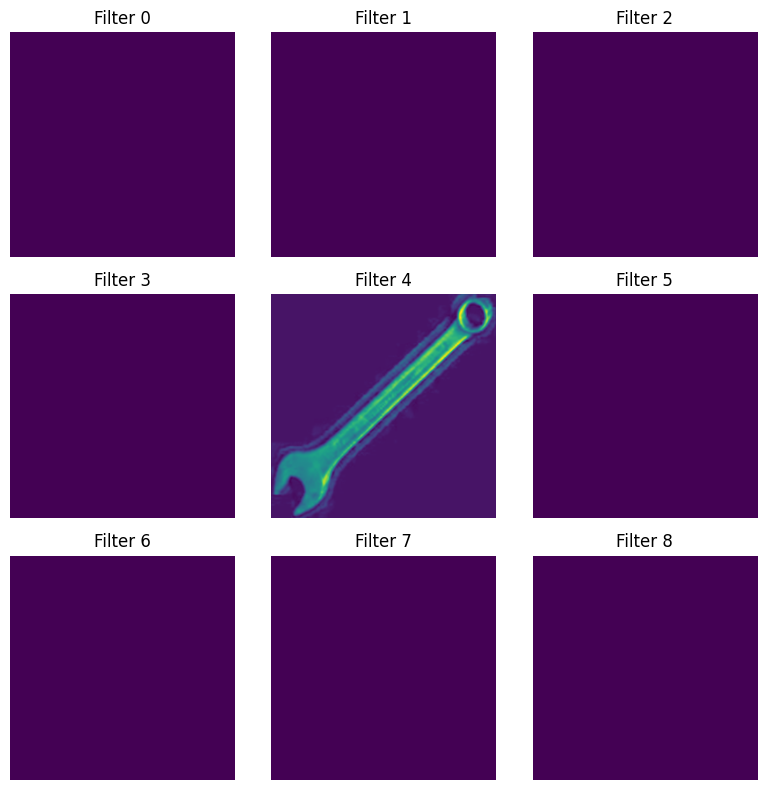

In [87]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model

# Prüfe ob feature_maps existiert und die richtige Form hat
if 'feature_maps' not in globals() or len(feature_maps.shape) < 4:
    print("⚠️ feature_maps hat nicht die richtige Form. Erstelle Feature-Extraktion-Modell...")
    
    # Prüfe ob img_batch existiert
    if 'img_batch' not in globals():
        print("⚠️ FEHLER: img_batch ist nicht definiert!")
        print("   Bitte führen Sie zuerst die vorherige Zelle aus, um img_batch zu erstellen.")
        raise NameError("img_batch muss zuerst erstellt werden!")
    
    # Finde eine Conv2D-Schicht im Modell für Feature-Extraktion
    conv_layer = None
    for layer in model1.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            conv_layer = layer
            break
    
    if conv_layer is None:
        print("⚠️ Keine Conv2D-Schicht gefunden. Verwende die erste Schicht mit mehreren Dimensionen...")
        # Fallback: Verwende die erste Schicht, die nicht Input/Rescaling ist
        for layer in model1.layers:
            if hasattr(layer, 'output_shape') and len(layer.output_shape) > 2:
                conv_layer = layer
                break
    
    if conv_layer is None:
        raise ValueError("Konnte keine geeignete Schicht für Feature-Extraktion finden!")
    
    # Erstelle Feature-Extraktion-Modell
    feature_model = Model(inputs=model1.input, outputs=conv_layer.output)
    feature_maps = feature_model.predict(img_batch, verbose=0)
    print(f"✓ Feature Maps erstellt. Shape: {feature_maps.shape}")

# Prüfe die Dimensionen der Feature Maps
if len(feature_maps.shape) == 4:
    # Feature Maps haben die Form (batch, height, width, channels)
    num_channels = feature_maps.shape[-1]
    num_to_show = min(9, num_channels)  # Zeige maximal 9 Kanäle
    
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        if i < num_to_show:
            ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
            ax.set_title(f'Filter {i}')
        else:
            ax.axis('off')  # Leere Subplots ausblenden
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ Feature Maps haben unerwartete Form: {feature_maps.shape}")
    print("   Erwartet: (batch, height, width, channels)")
    print(f"   Tatsächlich: {feature_maps.shape}")